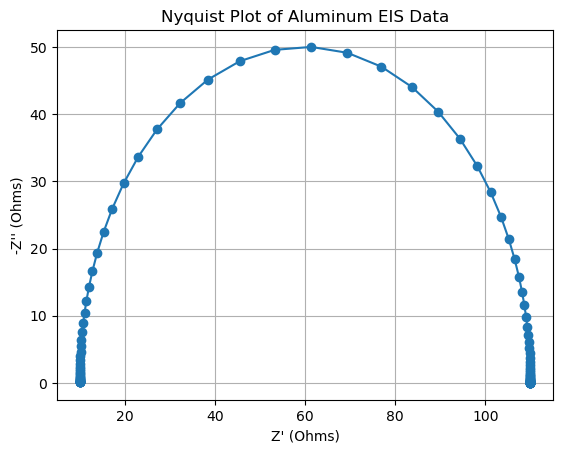

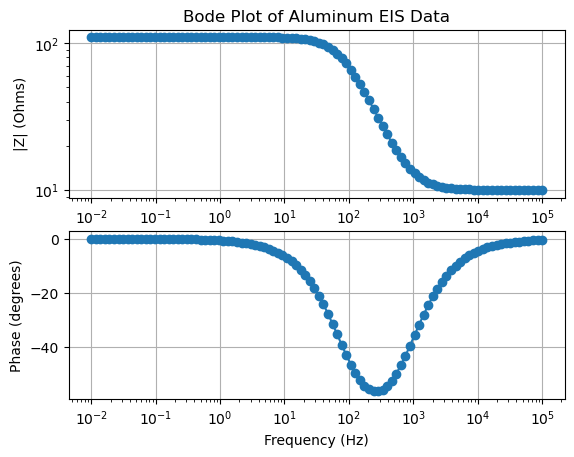

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Randles circuit parameters
R_s = 10  # Solution resistance in ohms
R_ct = 100  # Charge transfer resistance in ohms
C_dl = 20e-6  # Double layer capacitance in farads

# Define the frequency range for the EIS simulation
frequencies = np.logspace(5, -2, num=100)  # From 100 kHz to 10 mHz

# Calculate the impedance of the Randles circuit
def calculate_impedance(frequencies, R_s, R_ct, C_dl):
    omega = 2 * np.pi * frequencies
    Z_Rs = R_s
    Z_Cdl = 1 / (1j * omega * C_dl)
    Z_Rct = R_ct
    Z_total = Z_Rs + 1 / (1 / Z_Rct + 1 / Z_Cdl)
    return Z_total

Z = calculate_impedance(frequencies, R_s, R_ct, C_dl)

# Plot the Nyquist plot
plt.figure()
plt.plot(Z.real, -Z.imag, 'o-')
plt.xlabel('Z\' (Ohms)')
plt.ylabel('-Z\'\' (Ohms)')
plt.title('Nyquist Plot of Aluminum EIS Data')
plt.grid(True)
plt.show()

# Plot the Bode plot
plt.figure()
plt.subplot(2, 1, 1)
plt.loglog(frequencies, np.abs(Z), 'o-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|Z| (Ohms)')
plt.title('Bode Plot of Aluminum EIS Data')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.semilogx(frequencies, np.angle(Z, deg=True), 'o-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.grid(True)
plt.show()


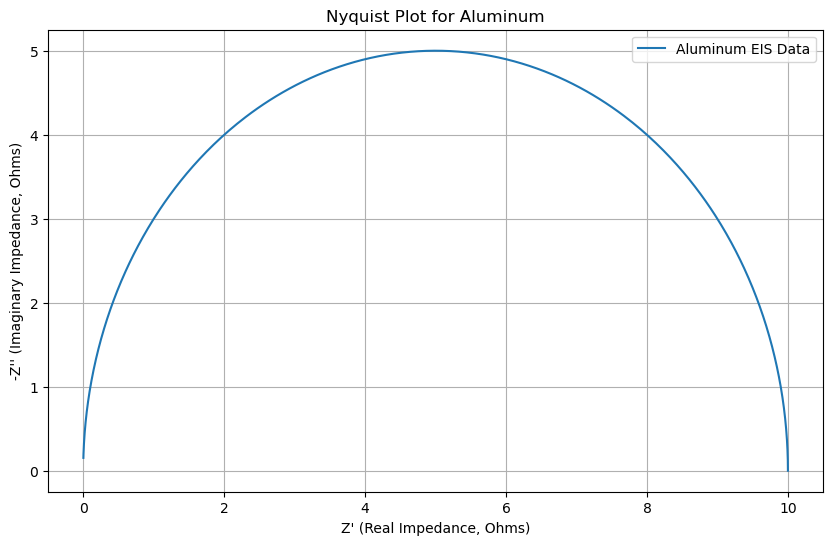

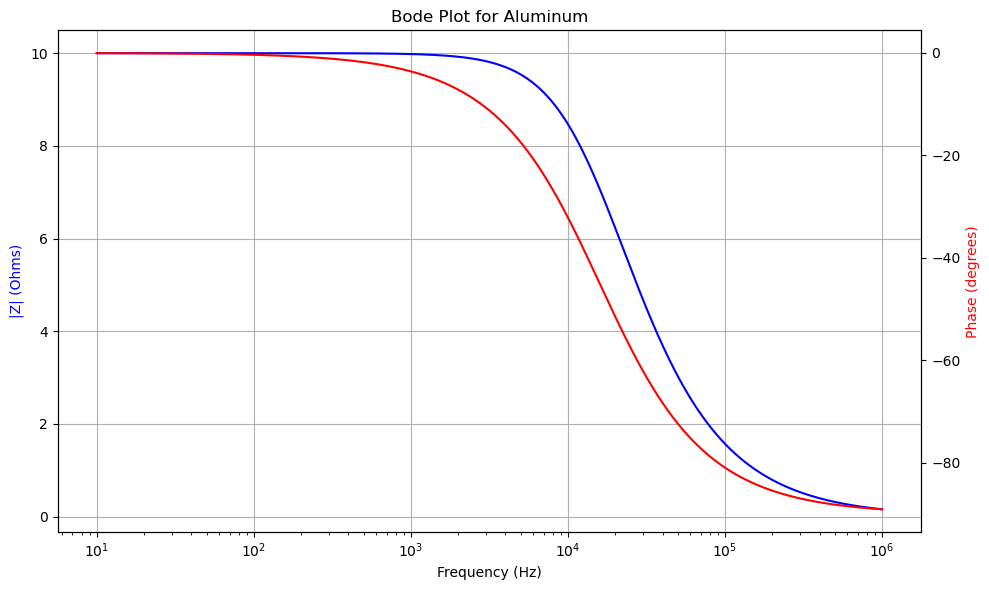

EIS data for aluminum has been saved to 'aluminum_eis_data.csv'.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the RC circuit
R = 10  # Resistance in ohms
C = 1e-6  # Capacitance in farads

# Frequency range
frequencies = np.logspace(1, 6, num=1000)  # from 10 Hz to 1 MHz
omega = 2 * np.pi * frequencies  # Angular frequency

# Calculate the impedance
Z_real = R / (1 + (omega * R * C)**2)
Z_imag = -omega * R**2 * C / (1 + (omega * R * C)**2)

# Plotting the Nyquist plot (Imaginary vs Real part of Impedance)
plt.figure(figsize=(10, 6))
plt.plot(Z_real, -Z_imag, label='Aluminum EIS Data')
plt.xlabel('Z\' (Real Impedance, Ohms)')
plt.ylabel('-Z\'\' (Imaginary Impedance, Ohms)')
plt.title('Nyquist Plot for Aluminum')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the Bode plot (Magnitude and Phase vs Frequency)
Z_magnitude = np.sqrt(Z_real**2 + Z_imag**2)
Z_phase = np.arctan2(Z_imag, Z_real) * 180 / np.pi

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xscale('log')
ax1.plot(frequencies, Z_magnitude, 'b', label='Magnitude')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('|Z| (Ohms)', color='b')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_xscale('log')
ax2.plot(frequencies, Z_phase, 'r', label='Phase')
ax2.set_ylabel('Phase (degrees)', color='r')

plt.title('Bode Plot for Aluminum')
fig.tight_layout()
plt.show()

# Save the data to a CSV file
import pandas as pd

data = {
    'Frequency (Hz)': frequencies,
    'Z_real (Ohms)': Z_real,
    'Z_imag (Ohms)': Z_imag,
    'Z_magnitude (Ohms)': Z_magnitude,
    'Z_phase (degrees)': Z_phase
}

df = pd.DataFrame(data)
df.to_csv('aluminum_eis_data.csv', index=False)

print("EIS data for aluminum has been saved to 'aluminum_eis_data.csv'.")


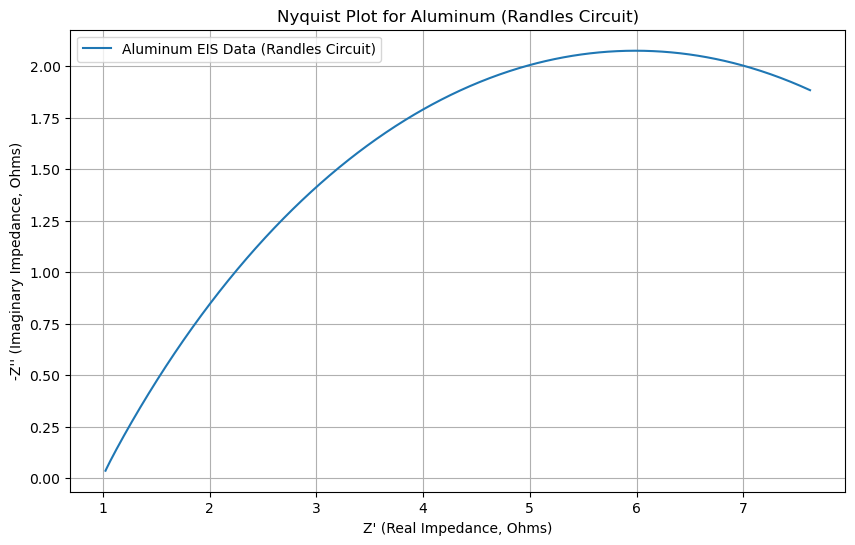

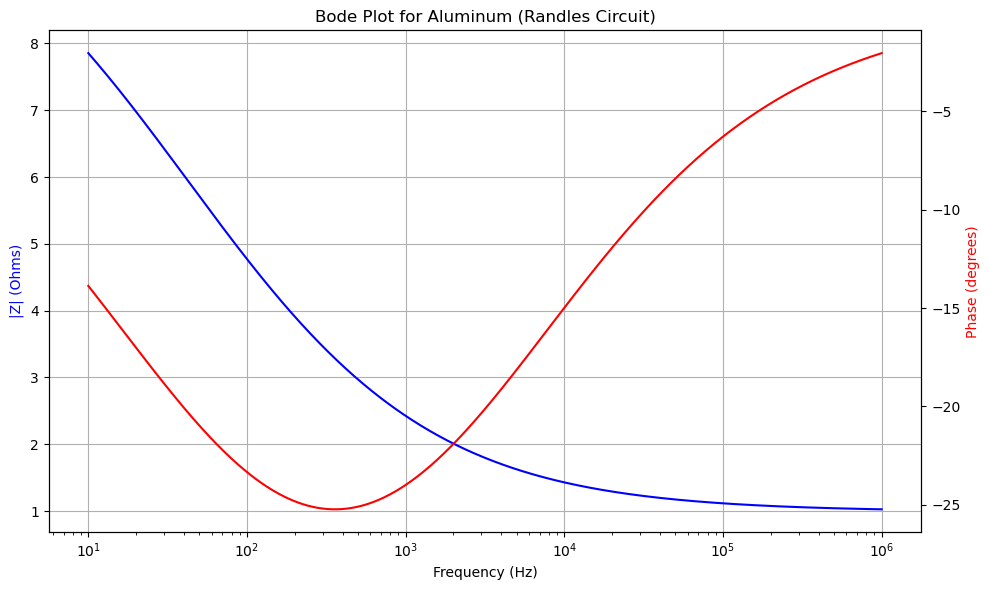

EIS data for aluminum (Randles Circuit) has been saved to 'aluminum_eis_data_randles.csv'.


In [3]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parameters for the Randles circuit
R_s = 1  # Solution resistance in ohms
R_ct = 10  # Charge transfer resistance in ohms
C_dl = 1e-6  # Double layer capacitance in farads
W = 100  # Warburg impedance coefficient (simplified model)

# Frequency range
frequencies = np.logspace(1, 6, num=1000)  # from 10 Hz to 1 MHz
omega = 2 * np.pi * frequencies  # Angular frequency

# Calculate the impedance of each component
Z_Rs = R_s  # Solution resistance
Z_Rct = R_ct  # Charge transfer resistance
Z_Cdl = 1 / (1j * omega * C_dl)  # Double layer capacitance
Z_W = W / np.sqrt(omega) * (1 - 1j)  # Warburg impedance (simplified)

# Total impedance of the Randles circuit
Z_total = Z_Rs + 1 / (1 / Z_Rct + 1 / Z_Cdl + 1 / Z_W)

# Separate the real and imaginary parts
Z_real = Z_total.real
Z_imag = Z_total.imag

# Plotting the Nyquist plot (Imaginary vs Real part of Impedance)
plt.figure(figsize=(10, 6))
plt.plot(Z_real, -Z_imag, label='Aluminum EIS Data (Randles Circuit)')
plt.xlabel('Z\' (Real Impedance, Ohms)')
plt.ylabel('-Z\'\' (Imaginary Impedance, Ohms)')
plt.title('Nyquist Plot for Aluminum (Randles Circuit)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the Bode plot (Magnitude and Phase vs Frequency)
Z_magnitude = np.abs(Z_total)
Z_phase = np.angle(Z_total, deg=True)

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xscale('log')
ax1.plot(frequencies, Z_magnitude, 'b', label='Magnitude')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('|Z| (Ohms)', color='b')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_xscale('log')
ax2.plot(frequencies, Z_phase, 'r', label='Phase')
ax2.set_ylabel('Phase (degrees)', color='r')

plt.title('Bode Plot for Aluminum (Randles Circuit)')
fig.tight_layout()
plt.show()

# Save the data to a CSV file
data = {
    'Frequency (Hz)': frequencies,
    'Z_real (Ohms)': Z_real,
    'Z_imag (Ohms)': Z_imag,
    'Z_magnitude (Ohms)': Z_magnitude,
    'Z_phase (degrees)': Z_phase
}

df = pd.DataFrame(data)
df.to_csv('aluminum_eis_data_randles.csv', index=False)

print("EIS data for aluminum (Randles Circuit) has been saved to 'aluminum_eis_data_randles.csv'.")